# Project - Thera Bank wants to explore ways to converts its customers to liability customers


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Saidabrorkhon\Downloads\Bank_Personal_Loan_Modelling.csv")

In [3]:
df.shape

(5000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df['Personal Loan'].sum()

np.int64(480)

In [8]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
df['CreditCard'].sum()

np.int64(1470)

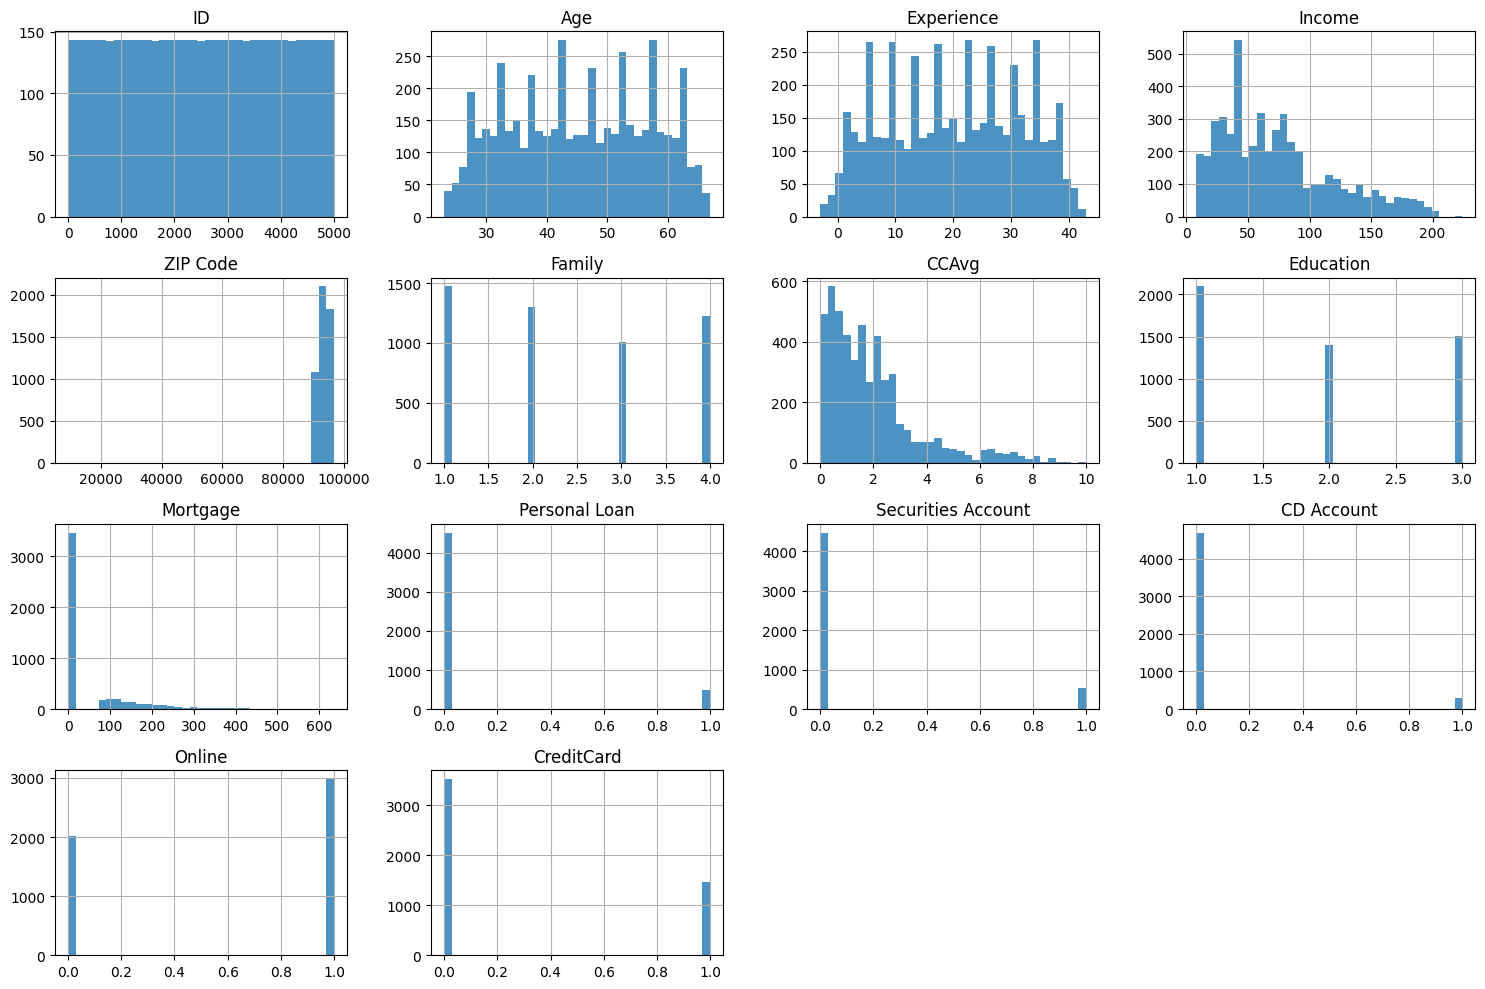

In [10]:
# histogram bir columndagi va bir qismga tegishli datani visual ko'rinishi. Bargraphdan farqi - boshqa datalar bilan qiyoslamasligida. Buyerda figsize - 15, 10 - figurning sizi. 15 x axis, 10 y axis. Bins o'sha har bir graphning kengligi. alpha binning to'q yoki ochligi.

df.hist(figsize=(15, 10), bins=35, alpha=0.8)
plt.tight_layout()
plt.show()

In [11]:
scaler = MinMaxScaler()

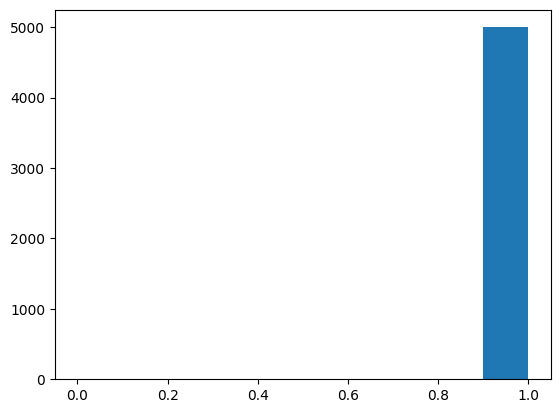

In [12]:
df['ZIP Code'] = scaler.fit_transform(df['ZIP Code'].values.reshape(-1, 1))
plt.hist(df['ZIP Code'])
plt.show()

In [13]:
# axis = 1 means columns
# axis = 0 means rows
x = df.drop(['ID','Personal Loan'], axis = 1)
y = df['Personal Loan']

In [14]:
model = LogisticRegression()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

In [16]:
model.fit(x_train, y_train)

LogisticRegression()

In [17]:
pred = model.predict(x_test)

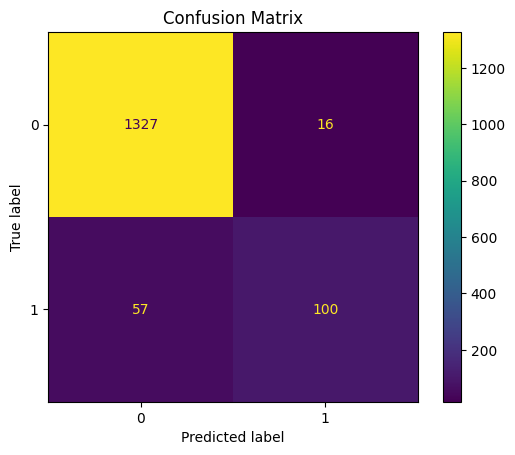

In [18]:
cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Confusion Matrix')
plt.show()

In [22]:
report = classification_report(y_test, pred)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.86      0.64      0.73       157

    accuracy                           0.95      1500
   macro avg       0.91      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [20]:
accuracy = accuracy_score(y_test, pred)
print('Accuracy:', accuracy * 100)

Accuracy: 95.13333333333334
